In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multipixel_camera_analysis
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [9]:
import sys
tools_dir = "/home/kmkohn/Tools" #if you want to read BeadDataFiles, add your import directory here
sys.path.append(tools_dir)
from BeadDataFile import *

In [10]:
#Calculates the pixel-by-pixel fourier transform of a camera datastream for a given h5 file
xtest = multipixel_camera_analysis.h5_fft('/data/beadVideos/bead1109/transfer_funcX/data.h5')

In [7]:
#Isolates the fft at a single frequency for a camera data file. Can either be isolated from an fft
#as calculated above, or from a file, which will find the whole fft then isolate the single frequency

xtest_271 = multipixel_camera_analysis.isolate_frequency(271, xtest)
#xtest_271 = multipixel_camera_analysis.isolate_frequency(271, '/data/beadVideos/bead1109/transfer_funcX/data.h5')

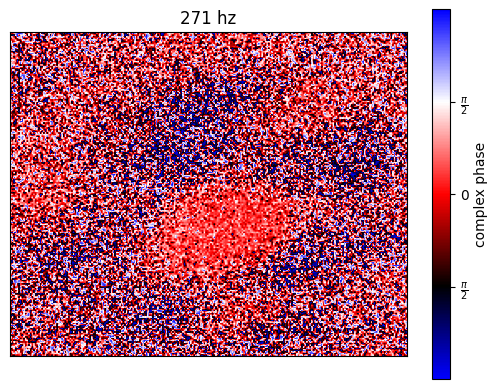

In [24]:
#Makes a plot of the complex phase of a given complex array
fig, ax = plt.subplots()
multipixel_camera_analysis.make_angleplot(fig, ax, xtest_271, '271 hz', mask=None)

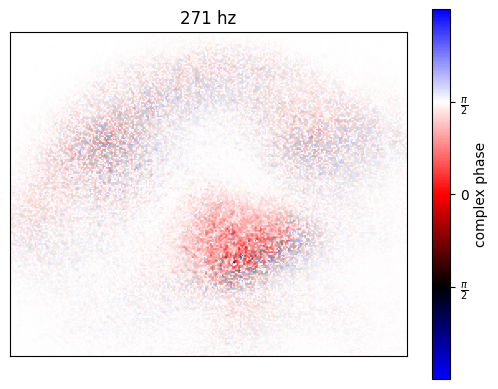

In [25]:
#Can also use a custom image as an alpha mask
fig, ax = plt.subplots()
image0 = multipixel_camera_analysis.getimage0('/data/beadVideos/bead1109/transfer_funcX/data.h5')
multipixel_camera_analysis.make_angleplot(fig, ax, xtest_271, '271 hz', mask=image0)

In [27]:
#Defines a parallel summer object from a given mask, then uses it to calculate the sum over a dataset
par = multipixel_camera_analysis.parallelsummer(xtest_271)
sums = par.parallelSumsMasked('/data/beadVideos/bead1109/transfer_funcX/data.h5')

Starting 
ForkPoolWorker-7Starting ForkPoolWorker-8
Starting ForkPoolWorker-9Starting
 ForkPoolWorker-10
Starting ForkPoolWorker-11
Starting ForkPoolWorker-12


In [29]:
#Calculate the psd
samplingrate = multipixel_camera_analysis.getsamplingrate('/data/beadVideos/bead1109/transfer_funcX/data.h5')
psd_calced = multipixel_camera_analysis.psd(np.abs(sums), samplingrate)


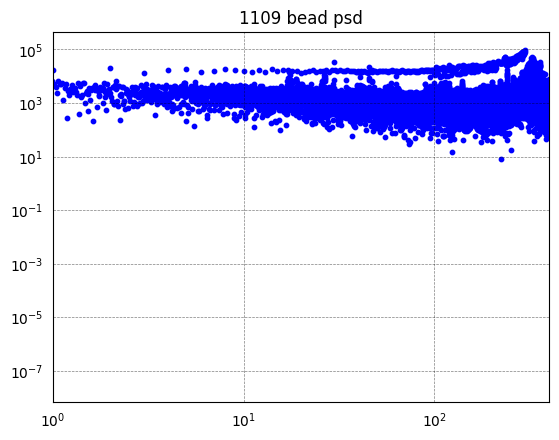

In [31]:
#Make a scatter plot
fig, ax = plt.subplots()
multipixel_camera_analysis.make_scatterplot(fig, ax, psd_calced, "1109 bead psd")


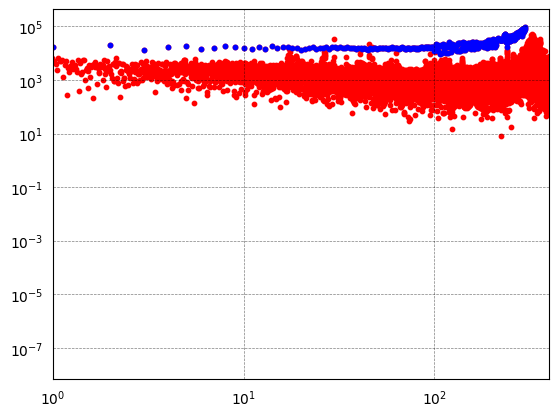

In [33]:
#How to use findclosestoset to plot integer values

plt.scatter(psd_calced[1], psd_calced[0], color='red', label='', alpha=1, s=10)

indices = multipixel_camera_analysis.findclosestoset(psd_calced[1], np.arange(0, 300))
plt.scatter(psd_calced[1][indices], psd_calced[0][indices], color='blue', label='', alpha=1, s=10)

plt.tick_params(axis='both',which='both', bottom=False, left=False)

plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 400)
plt.autoscale(axis='y')
plt.grid(which='major', linestyle='--', linewidth='0.5', color='black', alpha=0.5)

In [37]:
yquad = np.ones(image0.shape)
yquad[:len(yquad)//2, :] = -1

xquad = np.ones(image0.shape)
xquad[:, :len(yquad[0])//2] = -1

Starting StartingForkPoolWorker-19
 ForkPoolWorker-20
Starting ForkPoolWorker-21Starting
 ForkPoolWorker-22Starting
 ForkPoolWorker-23
Starting ForkPoolWorker-24
SNR for response in x to drive in x = 9.40048284437044
Starting ForkPoolWorker-25
Starting ForkPoolWorker-26
Starting ForkPoolWorker-27
Starting ForkPoolWorker-28
Starting ForkPoolWorker-29
Starting ForkPoolWorker-30
SNR for response in x to drive in y = 5.067517384706771
Starting ForkPoolWorker-31Starting 
ForkPoolWorker-32
Starting ForkPoolWorker-33
Starting ForkPoolWorker-34Starting
 ForkPoolWorker-35
Starting ForkPoolWorker-36
SNR for response in y to drive in x = 2.6488547975927323
Starting ForkPoolWorker-37

StartingForkPoolWorker-39
Starting ForkPoolWorker-38 Starting ForkPoolWorker-40
Starting ForkPoolWorker-41
Starting ForkPoolWorker-42
SNR for response in y to drive in y = 5.248305779655451


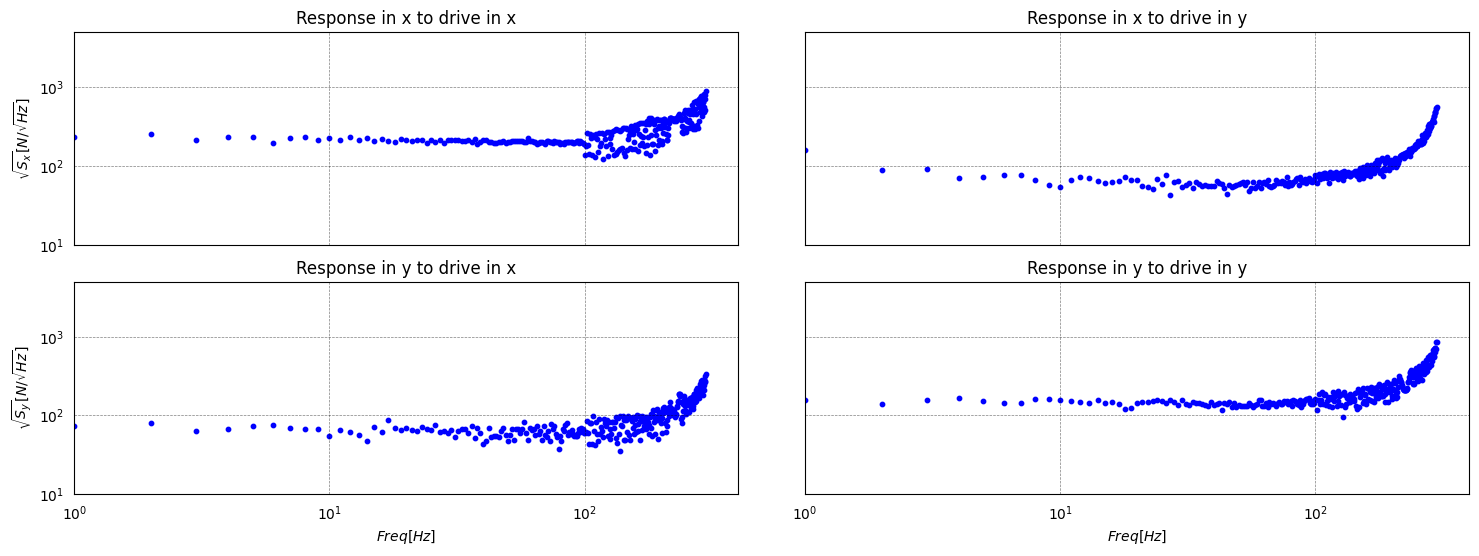

In [39]:
#This automatically plots the transfer function given x and y (and optionally z) files, and x and y maps
multipixel_camera_analysis.makeTransferFuncPlot(xquad, yquad, '/data/beadVideos/bead1109/transfer_funcX/data.h5', '/data/beadVideos/bead1109/transfer_funcY/data.h5',xvals=np.arange(1,299),plotname="quad_integers.png",ylim=(1e1,5e3))


In [3]:
#Automatically generates binarized masks from the phase map at a given frequency
masks = multipixel_camera_analysis.generate_masks('/data/beadVideos/bead1109/transfer_funcX/data.h5', '/data/beadVideos/bead1109/transfer_funcY/data.h5', 279)


Text(0.5, 1.0, 'Binarized mask for X')

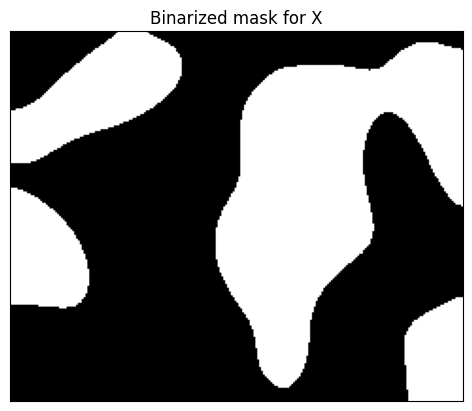

In [5]:
plt.imshow(masks[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Binarized mask for X")
#plt.savefig("Transfer_Functions/xmask.png")

Text(0.5, 1.0, 'Binarized mask for Y')

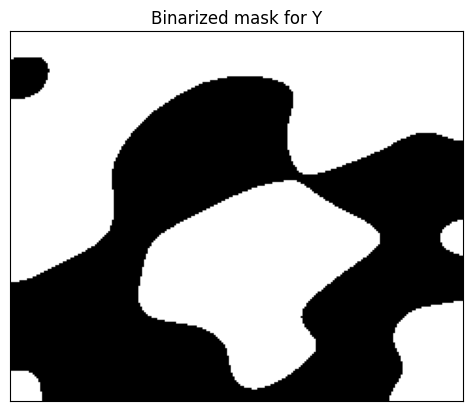

In [6]:
plt.imshow(masks[1], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Binarized mask for Y")
#plt.savefig("Transfer_Functions/ymask.png")

Text(0.5, 1.0, 'Binarized mask for Y')

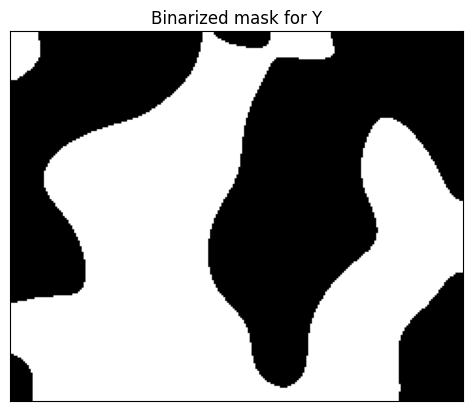

In [20]:
import scipy
def phase_to_mask(phasegrid, std=10):
    blurred = np.zeros(phasegrid.shape)
    phasegrid = np.abs(phasegrid)
    blurred = scipy.ndimage.gaussian_filter(phasegrid, std)
    blurred[np.where(blurred<np.pi/2)]=-1
    blurred[np.where(blurred>np.pi/2)]=1
    return blurred

plt.imshow(phase_to_mask(np.angle(xtest_271)), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Binarized mask for Y")